In [1]:
%reset
import numpy as np
from numpy.linalg import norm, inv
import time
import math
from correct_final_code_feb24 import *
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


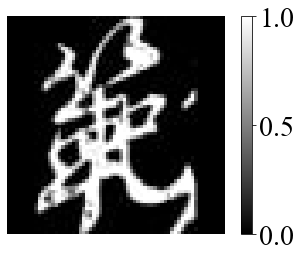

(64, 64)


In [3]:
# X_gray = np.random.rand(2,4)*256
# large.png

Xread = mpimg.imread('fan_original.jpeg')
from skimage.color import rgb2gray
X_gray = rgb2gray(Xread)
# X_gray = X_gray[90:170, 30:190]
plt.imshow(X_gray, cmap = 'gray')
plt.axis('off')
plt.colorbar()
plt.rcParams.update({'font.size': 28})
plt.rcParams['font.family'] = 'Times New Roman'
# plt.savefig('result_all_correct_Mar11/original_Fan_Mar28.pdf', bbox_inches='tight')
plt.show()

# plt.colorbar()
print(X_gray.shape)



In [4]:
L = 18
kernel_given = np.array([[0, -1, 0],
                         [-1, 4, -1],
                         [0, -1, 0]])
input_image = np.pad(X_gray,((1, 1), (1, 1)),'constant')

K = kernel_given.shape[1]
W = input_image.shape[1]
H = input_image.shape[0]
dim = int((W-(K - 1))/(L-(K - 1)))*L*H

print(dim)

a_input, dim = input_output_image_conv_large(input_image, L, K)
print(dim)

gamma_e = np.log(2)/4/np.pi # in the unit of Omega
gamma_e_t_R = gamma_e*2*np.pi

image = X_gray
in_dim = L
kernel_arr_neg, kernel_arr_pos, kernel_0 = kernel_to_array_0217(in_dim, 
                                                                kernel_given)

kernel_big_should = populate_matrix_posNeg(dim, kernel_arr_neg, 
                                           kernel_arr_pos, kernel_0)

4752
4752


In [5]:
norm_fac = 8.781027653077974
# 
YDim = 500
kappa_pos, kappa_neg, kappa0 = from_S_get_kappa_0718(kernel_arr_pos, kernel_arr_neg,
                                                     kernel_0, norm_fac, YDim)
# kappa is in the unit of gamma_e

A_list, B_list, gamma0 = find_modulate_AmpPha_0718_without_angle(kappa_pos,
                                                                 kappa_neg, kappa0)

In [6]:
B_list[0:50]

array([ 2.82044312e+00, -9.10126295e-01,  3.16892633e-01, -1.15836953e-01,
        4.39272010e-02, -1.67862814e-02,  6.58954200e-03, -2.13744957e-03,
        1.64178509e-04,  2.13039491e-03, -5.83623160e-03,  1.53028414e-02,
       -3.82557724e-02,  9.69381640e-02, -2.44115232e-01,  6.07440555e-01,
       -1.43376931e+00,  2.82044339e+00, -1.43376939e+00,  6.07440783e-01,
       -2.44115860e-01,  9.69397742e-02, -3.82600627e-02,  1.53141805e-02,
       -5.86673559e-03,  2.21316880e-03, -6.39934901e-05, -1.49790910e-03,
        4.75846373e-03, -1.14069736e-02,  2.76117386e-02, -6.43780565e-02,
        1.46728341e-01, -3.15301252e-01,  6.07441636e-01, -9.10127724e-01,
        6.07441772e-01, -3.15301684e-01,  1.46729425e-01, -6.43809447e-02,
        2.76191661e-02, -1.14265543e-02,  4.81000186e-03, -1.63519365e-03,
        3.04345472e-04,  1.21448805e-03, -3.13144543e-03,  7.74177726e-03,
       -1.70939416e-02,  3.73927433e-02])

In [7]:
cutoff_1 = 50
A_list1 = A_list[:cutoff_1]
B_list1 = B_list[:cutoff_1]

alpha_list1 = np.pi/2*np.ones_like(A_list1)
beta_list1 = np.pi/2*np.ones_like(A_list1)

kappa_posBuil1, kappa_negBuil1, kappa0Buil1 = forward_build_Xvec_0718_without_angle(A_list1,
                                                                                    B_list1,
                                                                                    gamma0)
norm_fac_from_now = 1

kernel_arr_posBuil1, kernel_arr_negBuil1, kernel_0Buil1 = from_kappa_get_S_0718(kappa_posBuil1,
                                                                                kappa_negBuil1, 
                                                                                kappa0Buil1, 
                                                                                norm_fac_from_now, YDim)

kernel_big_buil1 = populate_matrix_posNeg(dim, kernel_arr_negBuil1, 
                                          kernel_arr_posBuil1, kernel_0Buil1)

print(gamma0*gamma_e)

(0.21252926729298588-8.112207968369364e-20j)


In [8]:
alpha_list = np.pi/2*np.ones_like(A_list)
beta_list = np.pi/2*np.ones_like(A_list)

kappa_posBuild, kappa_negBuild, kappa0Build = forward_build_Xvec_0718_without_angle(A_list,
                                                                                    B_list,
                                                                                    gamma0)
norm_fac_from_now = 1

kernel_arr_posBuild, kernel_arr_negBuild, kernel_0Build = from_kappa_get_S_0718(kappa_posBuild,
                                                                                kappa_negBuild, 
                                                                                kappa0Build, 
                                                                                norm_fac_from_now, YDim)

kernel_big_built = populate_matrix_posNeg(dim, kernel_arr_negBuild, 
                                          kernel_arr_posBuild, kernel_0Build)

In [9]:
np.max(abs(kernel_big_built - kernel_big_buil1))

0.011378722799276837

In [10]:
# def plot_matrix(mat, figsize, cmap=plt.cm.coolwarm):
#     f = plt.figure(figsize=figsize)
#     ax = plt.axes([0.05, 0.05, 0.6, 0.6]) #left, bottom, width, height
#     #note that we are forcing width:height=1:1 here, 
#     #as 0.9*8 : 0.9*8 = 1:1, the figure size is (8,8)
#     #if the figure size changes, the width:height ratio here also need to be changed
#     im = ax.imshow(mat, interpolation='nearest', cmap=cmap)
#     ax.grid(False)
#     cax = plt.axes([0.7, 0.05, 0.05, 0.6])
#     plt.colorbar(mappable=im, cax=cax)
#     return ax, cax
# # result 4
# plt.rc('xtick', labelsize=18)
# plt.rc('ytick', labelsize=18)
# plt.rcParams['font.family'] = 'Times New Roman'
# data = np.real(kernel_big_built[:40, :40])
# ax, cax = plot_matrix(data, (8,8)) 
# plt.savefig('result_all_correct_Mar11/Figure5_Fan_kernel_matrix_built_Mar28.pdf')

In [11]:
# def passivity_metric(gamma0, B_list, beta_list):
#     t_list = np.arange(0, 2*np.pi, 0.01)
#     result_list = np.zeros(t_list.shape, dtype = complex)
    
#     # for all the t find the max of this
#     index_list = np.arange(0, len(B_list),1)+1
#     for ii, t in enumerate(t_list):
#         result_list[ii] = sum(B_list*np.sin(index_list*t + beta_list))
#     constraint = max(result_list)
#     return gamma0 > constraint


# print(passivity_metric(gamma0, (B_list[:dim]), beta_list[:dim]))
# norm_fac

In [12]:
# fig, axs = plt.subplots()
# ax0 = axs
# # result 2
# plt.bar(np.arange(0, len(A_list[:cut_site]),1)+1, alpha_list[:cut_site], fc = 'r', width = 1, label = '$A_m$')
# plt.bar(np.arange(0, len(A_list[:cut_site]),1)+1 + 0.5, beta_list[:cut_site], fc = 'b',  width = 1, label = '$B_m$')

# # plt.legend(prop={'size': 20})
# plt.rc('xtick', labelsize=20)
# plt.rc('ytick', labelsize=20)
# plt.rcParams['font.family'] = 'Times New Roman'
# # ax0.set_yticks([0, 0.05, 0.1])
# # ax0.set_xticks([1, 26, 52])
# plt.legend(frameon=False, prop={'size': 20})
# # plt.savefig('Figure5_Amplitude_right_Fan_Mar8.pdf')
# plt.show()

In [13]:
_, out_form_slice_original = input_output_slice_output_0301(kernel_big_built, a_input, K, input_image, L)

_, out_form_slice_cutoff = input_output_slice_output_0301(kernel_big_buil1, a_input, K, input_image, L)


# print(np.max(abs(kernel_big_built - kernel_big_mat)))

In [14]:
print(np.max(out_form_slice_cutoff.real))
print(np.min(out_form_slice_cutoff.real))
print(np.max(out_form_slice_original.real))
print(np.min(out_form_slice_original.real))

0.21206549622133267
-0.1627200228653675
0.21660615367612934
-0.16290053906684782


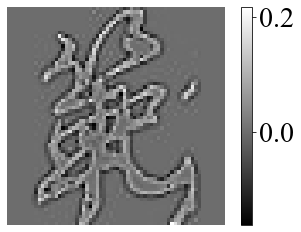

In [15]:
plt.imshow(out_form_slice_original.real, cmap = 'gray', vmin = -0.163, vmax = 0.217)
plt.axis('off')
plt.colorbar()
plt.rcParams.update({'font.size': 28})
plt.rcParams['font.family'] = 'Times New Roman'
# plt.savefig('result_all_correct_Mar11/Figure5_output_image_Fan_Mar28.pdf', bbox_inches='tight')
plt.show()


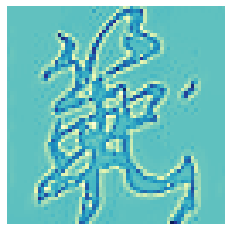

In [16]:
plt.imshow(out_form_slice_cutoff.real, cmap = 'YlGnBu')
plt.axis('off')
# plt.colorbar()
plt.rcParams.update({'font.size': 28})
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig('result_all_correct_Mar11/Figure5_output_cutoff_image_Fan_Apr01.pdf', bbox_inches='tight')
plt.show()


In [21]:
# modulation
t_list = np.linspace(0, 2*np.pi, num=1000, endpoint=True)
amplitude_list = np.zeros(t_list.shape)
phase_list = np.zeros(t_list.shape)

# for all the t find the max of this
index_list = np.arange(0, len(B_list),1)+1
for ii, t in enumerate(t_list):
    
    amplitude_list[ii] = sum(B_list*gamma_e_t_R*np.sin(index_list*t + beta_list))-gamma0*gamma_e_t_R
    phase_list[ii] = sum(A_list*gamma_e_t_R*np.cos(index_list*t + alpha_list))


<ipython-input-21-e387eee436ef>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  amplitude_list[ii] = sum(B_list*gamma_e_t_R*np.sin(index_list*t + beta_list))-gamma0*gamma_e_t_R


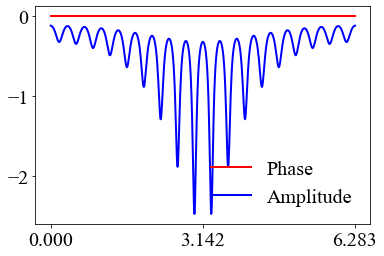

In [22]:
fig, axs = plt.subplots()
ax0 = axs

plt.plot(t_list, phase_list*gamma_e_t_R,'r',linewidth=2.0, label = 'Phase')
plt.plot(t_list, amplitude_list*gamma_e_t_R, 'b',linewidth=2.0, label = 'Amplitude')

plt.legend(frameon=False, loc='lower right', prop={'size': 20})
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
# plt.ylim([-0.35, 0.3])
plt.rcParams['font.family'] = 'Times New Roman'
# ax0.set_yticks([0, 0.05, 0.1])
ax0.set_xticks([0, np.pi, np.pi*2])
plt.savefig('result_all_correct_Mar11/Figure5_Fan_modulated_form_Mar28.pdf', bbox_inches='tight')
plt.show()

In [25]:
out_definition = conv_by_definition_Nov18(image, kernel_given)
print(np.max(abs(out_definition/norm_fac- out_form_slice)/np.max(abs(out_form_slice))))

0.09099501540776557


In [26]:
print(np.max(abs(kernel_big_built- kernel_big_should/norm_fac)/np.max(abs(kernel_big_should))))

0.0015049536854163331
